   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

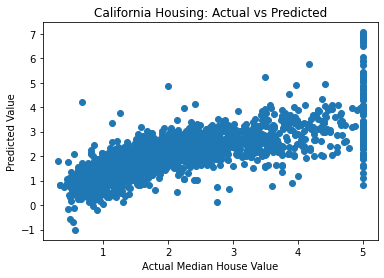

R-squared (train): 0.609
R-squared (test):  0.581
MAE: 0.542
MSE: 0.559
RMSE: 0.748
10% of mean target value: 0.207


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df["MedHouseVal"] = y
print(df.head())
print(df.describe())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
y_pred = model.predict(X_test)
print("First 5 predictions:", y_pred[:5])
print("First 5 actual:", y_test[:5])
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("California Housing: Actual vs Predicted")
plt.show()
print("R-squared (train): %.3f" % model.score(X_train, y_train))
print("R-squared (test):  %.3f" % model.score(X_test, y_test))
print("MAE: %.3f" % metrics.mean_absolute_error(y_test, y_pred))
print("MSE: %.3f" % metrics.mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"10% of mean target value: {np.mean(y_test) * 0.1:.3f}")
